In [150]:
import requests

In [196]:
b = requests.get("https://api.nasa.gov/neo/rest/v1/feed?start_date=2023-09-20&end_date=2023-09-21&api_key=DEMO_KEY")

In [197]:
data = b.json()

In [198]:
data.keys()

dict_keys(['links', 'element_count', 'near_earth_objects'])

In [199]:
data["links"]

{'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2023-09-21&end_date=2023-09-22&detailed=false&api_key=DEMO_KEY',
 'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2023-09-19&end_date=2023-09-20&detailed=false&api_key=DEMO_KEY',
 'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2023-09-20&end_date=2023-09-21&detailed=false&api_key=DEMO_KEY'}

In [200]:
data["element_count"]

22

In [201]:
data["near_earth_objects"]

{'2023-09-20': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2308899?api_key=DEMO_KEY'},
   'id': '2308899',
   'neo_reference_id': '2308899',
   'name': '308899 (2006 SL198)',
   'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2308899',
   'absolute_magnitude_h': 18.37,
   'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.5630603897,
     'estimated_diameter_max': 1.2590413069},
    'meters': {'estimated_diameter_min': 563.0603897491,
     'estimated_diameter_max': 1259.0413069164},
    'miles': {'estimated_diameter_min': 0.3498693974,
     'estimated_diameter_max': 0.7823317559},
    'feet': {'estimated_diameter_min': 1847.3110491043,
     'estimated_diameter_max': 4130.7130813836}},
   'is_potentially_hazardous_asteroid': False,
   'close_approach_data': [{'close_approach_date': '2023-09-20',
     'close_approach_date_full': '2023-Sep-20 06:42',
     'epoch_date_close_approach': 1695192120000,
     'relative_velocity': {'kilometers_per_second': '13.

In [202]:
type(data["near_earth_objects"])

dict

In [203]:
data["near_earth_objects"]

{'2023-09-20': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2308899?api_key=DEMO_KEY'},
   'id': '2308899',
   'neo_reference_id': '2308899',
   'name': '308899 (2006 SL198)',
   'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2308899',
   'absolute_magnitude_h': 18.37,
   'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.5630603897,
     'estimated_diameter_max': 1.2590413069},
    'meters': {'estimated_diameter_min': 563.0603897491,
     'estimated_diameter_max': 1259.0413069164},
    'miles': {'estimated_diameter_min': 0.3498693974,
     'estimated_diameter_max': 0.7823317559},
    'feet': {'estimated_diameter_min': 1847.3110491043,
     'estimated_diameter_max': 4130.7130813836}},
   'is_potentially_hazardous_asteroid': False,
   'close_approach_data': [{'close_approach_date': '2023-09-20',
     'close_approach_date_full': '2023-Sep-20 06:42',
     'epoch_date_close_approach': 1695192120000,
     'relative_velocity': {'kilometers_per_second': '13.

In [204]:
import pandas as pd

In [205]:
all_names = []
all_magnitudes = []
all_diameter_min = []
all_diameter_max = []
all_is_dangerous = []
all_close_approach_dates = []
all_kim = []
all_miss = []

# Loop through all dates and extract attributes
for date, objects in data["near_earth_objects"].items():
    for entry in objects:
        all_names.append(entry["name"])
        all_magnitudes.append(entry["absolute_magnitude_h"])
        all_diameter_min.append(entry["estimated_diameter"]["kilometers"]["estimated_diameter_min"])
        all_diameter_max.append(entry["estimated_diameter"]["kilometers"]["estimated_diameter_max"])
        all_is_dangerous.append(entry["is_potentially_hazardous_asteroid"])
        all_close_approach_dates.append(entry["close_approach_data"][0]["close_approach_date_full"])
        all_kim.append(entry["close_approach_data"][0]["relative_velocity"]["kilometers_per_second"])
        all_miss.append(entry["close_approach_data"][0]["miss_distance"]["kilometers"])

# Create a DataFrame
df = pd.DataFrame({
    "Name": all_names,
    "Magnitude": all_magnitudes,
    "Diameter (min)": all_diameter_min,
    "Diameter (max)": all_diameter_max,
    "Is Dangerous": all_is_dangerous,
    "Close Approach Date": all_close_approach_dates,
    "Speed in KM": all_kim,
    "Miss Distance": all_miss
})

df

,Name,Magnitude,Diameter (min),Diameter (max),Is Dangerous,Close Approach Date,Speed in KM,Miss Distance
0,308899 (2006 SL198),18.370,0.563060,1.259041,False,2023-Sep-20 06:42,13.7590725786,49990790.878189195
1,523598 (2003 ED50),20.860,0.178877,0.399982,True,2023-Sep-20 22:05,24.9769023139,7593732.676978373
2,(2009 PC),23.200,0.060891,0.136157,False,2023-Sep-20 01:58,9.0322423357,51940953.767917201
3,(2012 WH1),23.900,0.044112,0.098637,False,2023-Sep-20 06:26,12.7238948742,23422519.761286889
4,(2016 EC86),21.500,0.133216,0.297879,False,2023-Sep-20 14:54,11.3555383593,66721093.682403059
5,(2018 HL1),23.900,0.044112,0.098637,False,2023-Sep-20 23:05,26.7806071035,72003843.340511994
6,(2018 SA1),21.040,0.164647,0.368163,False,2023-Sep-20 09:28,20.0506452417,68372082.224626475
7,(2020 HP1),28.600,0.005065,0.011325,False,2023-Sep-20 03:14,5.4525532629,9420460.778431957
8,(2021 VU5),27.500,0.008405,0.018795,False,2023-Sep-20 16:21,10.5739519201,32011575.926039604
9,87684 (2000 SY2),16.050,1.638910,3.664713,True,2023-Sep-21 19:21,29.2511923887,39298393.89716193


In [206]:
import seaborn as sns

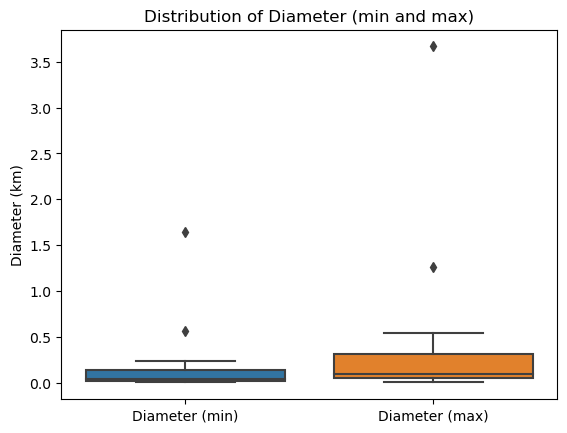

In [211]:
sns.boxplot(data=df[['Diameter (min)', 'Diameter (max)']])
plt.ylabel('Diameter (km)')
plt.title('Distribution of Diameter (min and max)')
plt.show()


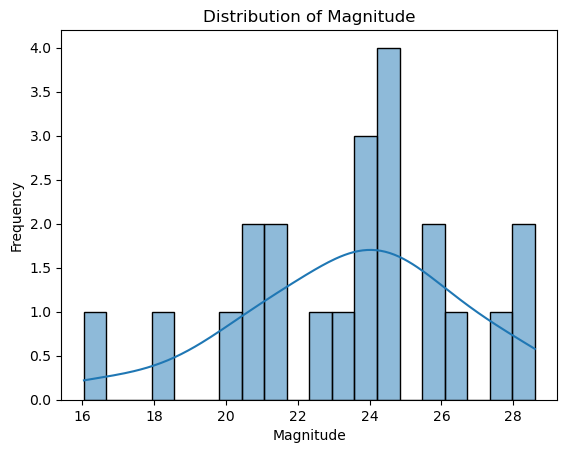

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Magnitude'], bins=20, kde=True)
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Magnitude')
plt.show()


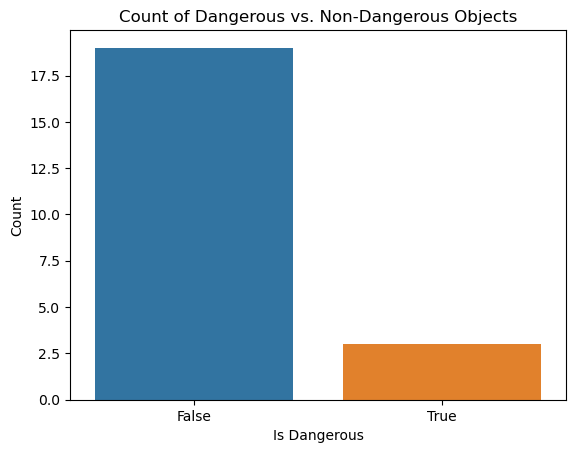

In [212]:
sns.countplot(x='Is Dangerous', data=df)
plt.xlabel('Is Dangerous')
plt.ylabel('Count')
plt.title('Count of Dangerous vs. Non-Dangerous Objects')
plt.show()


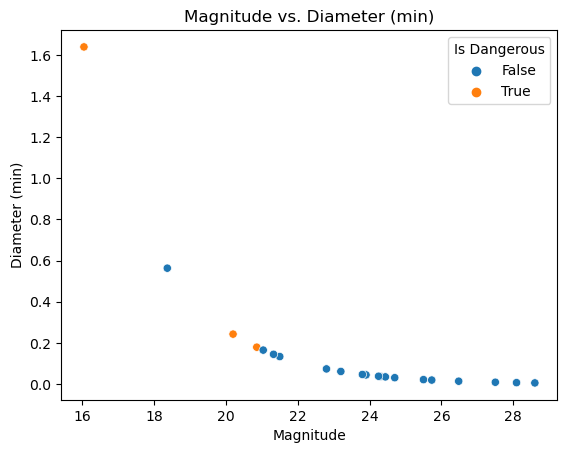

In [213]:
sns.scatterplot(x='Magnitude', y='Diameter (min)', data=df, hue='Is Dangerous')
plt.xlabel('Magnitude')
plt.ylabel('Diameter (min)')
plt.title('Magnitude vs. Diameter (min)')
plt.show()


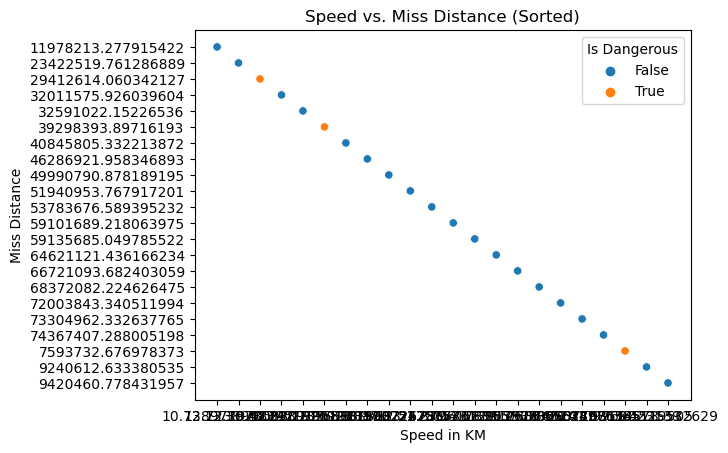

In [215]:
df_sorted = df.sort_values(by='Miss Distance')

# Create the scatter plot with sorted data
sns.scatterplot(x='Speed in KM', y='Miss Distance', data=df_sorted, hue='Is Dangerous')
plt.xlabel('Speed in KM')
plt.ylabel('Miss Distance')
plt.title('Speed vs. Miss Distance (Sorted)')
plt.show()